In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [5]:
# ----------------------------
# Load Dataset
# ----------------------------

df = pd.read_csv('../data/simulation_security_labels_n-1.csv') 

In [6]:
df

,timestamp,status,max_line_loading_percent_basecase,min_bus_voltage_pu_basecase,max_bus_voltage_pu_basecase,max_line_loading_percent_contingency,min_bus_voltage_pu_contingency,max_bus_voltage_pu_contingency,load_0_p_mw,load_1_p_mw,...,sgen_100_p_mw,sgen_101_p_mw,sgen_102_p_mw,sgen_103_p_mw,sgen_104_p_mw,sgen_105_p_mw,sgen_106_p_mw,sgen_107_p_mw,sgen_108_p_mw,sgen_109_p_mw
0,2023-01-01 00:00:00,secure,11.611054,1.0,1.042352,33.233070,1.0,1.062151,219.00,219.00,...,9.272727,9.272727,9.272727,9.272727,14.833333,14.833333,14.833333,14.833333,14.833333,14.833333
1,2023-01-01 01:00:00,secure,15.985442,1.0,1.042352,43.573396,1.0,1.062151,207.80,207.80,...,10.227273,10.227273,10.227273,10.227273,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2023-01-01 02:00:00,insecure,22.694429,1.0,1.042350,NaN,NaN,NaN,199.35,199.35,...,11.295455,11.295455,11.295455,11.295455,4.166667,4.166667,4.166667,4.166667,4.166667,4.166667
3,2023-01-01 03:00:00,insecure,25.079556,1.0,1.042350,NaN,NaN,NaN,188.80,188.80,...,13.022727,13.022727,13.022727,13.022727,4.833333,4.833333,4.833333,4.833333,4.833333,4.833333
4,2023-01-01 04:00:00,secure,32.046421,1.0,1.042347,83.938807,1.0,1.062151,181.60,181.60,...,14.431818,14.431818,14.431818,14.431818,4.833333,4.833333,4.833333,4.833333,4.833333,4.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8764,2023-12-31 19:00:00,insecure,77.302864,1.0,1.042334,NaN,NaN,NaN,345.85,345.85,...,7.000000,7.000000,7.000000,7.000000,214.166667,214.166667,214.166667,214.166667,214.166667,214.166667
8765,2023-12-31 20:00:00,insecure,72.511584,1.0,1.042338,NaN,NaN,NaN,329.75,329.75,...,8.045455,8.045455,8.045455,8.045455,194.333333,194.333333,194.333333,194.333333,194.333333,194.333333
8766,2023-12-31 21:00:00,insecure,58.866739,1.0,1.042348,NaN,NaN,NaN,298.20,298.20,...,9.431818,9.431818,9.431818,9.431818,144.333333,144.333333,144.333333,144.333333,144.333333,144.333333
8767,2023-12-31 22:00:00,insecure,50.624502,1.0,1.042352,NaN,NaN,NaN,263.05,263.05,...,11.568182,11.568182,11.568182,11.568182,96.166667,96.166667,96.166667,96.166667,96.166667,96.166667


In [7]:
# ----------------------------
# Basic Dataset Overview
# ----------------------------

print(df.shape) 
print(df.columns) 
print(df.info())  
print(df.describe())  

(8769, 273)
Index(['timestamp', 'status', 'max_line_loading_percent_basecase',
       'min_bus_voltage_pu_basecase', 'max_bus_voltage_pu_basecase',
       'max_line_loading_percent_contingency',
       'min_bus_voltage_pu_contingency', 'max_bus_voltage_pu_contingency',
       'load_0_p_mw', 'load_1_p_mw',
       ...
       'sgen_100_p_mw', 'sgen_101_p_mw', 'sgen_102_p_mw', 'sgen_103_p_mw',
       'sgen_104_p_mw', 'sgen_105_p_mw', 'sgen_106_p_mw', 'sgen_107_p_mw',
       'sgen_108_p_mw', 'sgen_109_p_mw'],
      dtype='object', length=273)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8769 entries, 0 to 8768
Columns: 273 entries, timestamp to sgen_109_p_mw
dtypes: float64(271), object(2)
memory usage: 18.3+ MB
None
       max_line_loading_percent_basecase  min_bus_voltage_pu_basecase  \
count                        8769.000000                       8769.0   
mean                           46.791943                          1.0   
std                            33.400239              

In [8]:
# ----------------------------
# Target Label Distribution
# ----------------------------

print(df['status'].value_counts())

status
secure      4497
insecure    4272
Name: count, dtype: int64


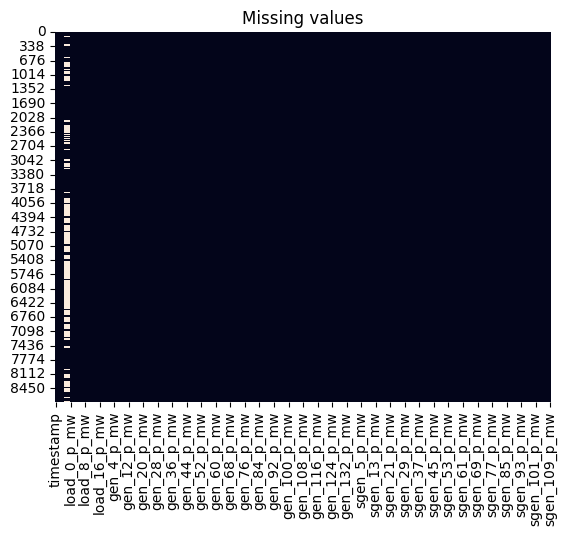

In [9]:
# ----------------------------
# Missing Values Visualization
# ----------------------------
# This heatmap shows the locations of missing values across the dataset.
# Each column represents a feature (e.g., generator or load measurement),
# and each row is a time step (hourly simulation).
# White lines indicate missing values in specific features at certain time steps.
# The heatmap reveals that missing values are sparse and concentrated in a few features only.

sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing values")
plt.show()

In [10]:
missing_cols = df.isnull().sum()
missing_cols

timestamp                            0
status                               0
max_line_loading_percent_basecase    0
min_bus_voltage_pu_basecase          0
max_bus_voltage_pu_basecase          0
                                    ..
sgen_105_p_mw                        0
sgen_106_p_mw                        0
sgen_107_p_mw                        0
sgen_108_p_mw                        0
sgen_109_p_mw                        0
Length: 273, dtype: int64

In [11]:
missing_cols = missing_cols[missing_cols > 0]
print(missing_cols)

max_line_loading_percent_contingency    4272
min_bus_voltage_pu_contingency          4272
max_bus_voltage_pu_contingency          4272
dtype: int64


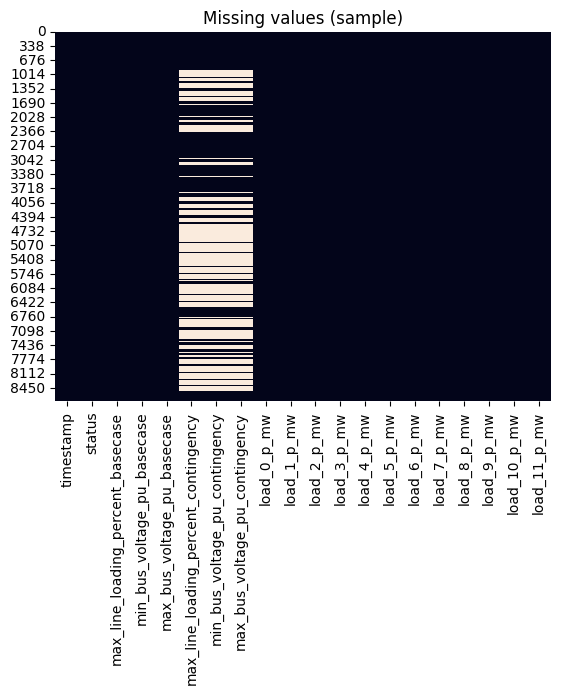

In [12]:
sample_df = df.iloc[:10000, :20]
sns.heatmap(sample_df.isnull(), cbar=False)
plt.title("Missing values (sample)")
plt.show()

In [13]:
# ----------------------------
# Checking duplicate values 
# ----------------------------

df.nunique()

timestamp                            8760
status                                  2
max_line_loading_percent_basecase    8760
min_bus_voltage_pu_basecase             1
max_bus_voltage_pu_basecase          8760
                                     ... 
sgen_105_p_mw                        1332
sgen_106_p_mw                        1332
sgen_107_p_mw                        1332
sgen_108_p_mw                        1332
sgen_109_p_mw                        1332
Length: 273, dtype: int64

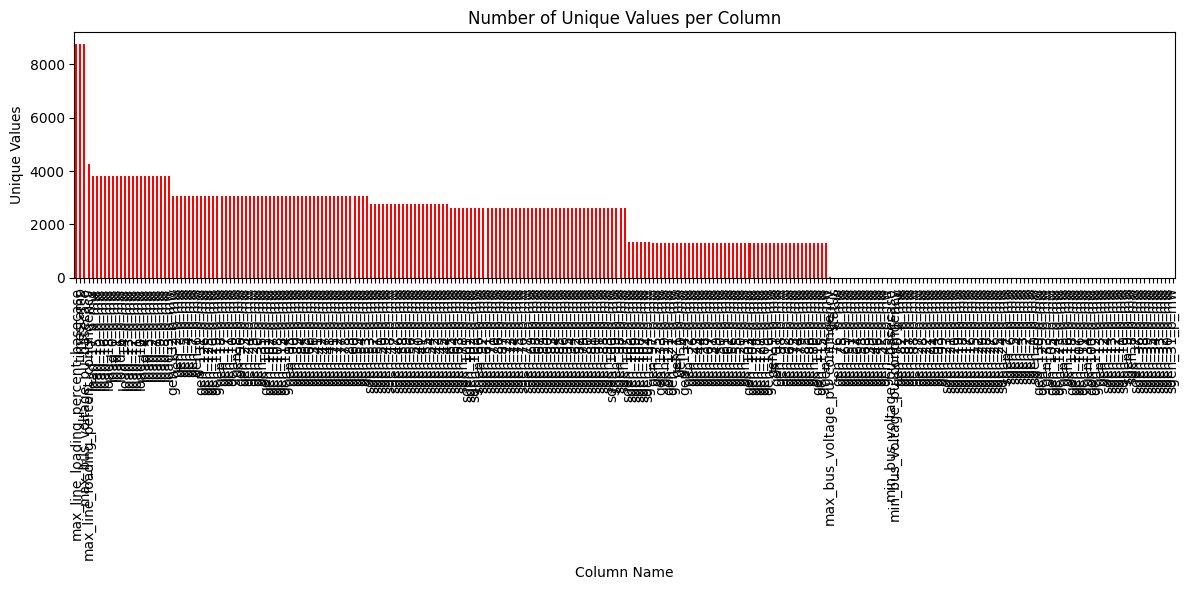

In [14]:
unique_counts = df.nunique().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
unique_counts.plot(kind='bar', color='red')
plt.title('Number of Unique Values per Column')
plt.xlabel('Column Name')
plt.ylabel('Unique Values')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [15]:
few_uniques = unique_counts[unique_counts < 10]
print(few_uniques)

status          2
gen_76_p_mw     1
gen_75_p_mw     1
gen_69_p_mw     1
gen_51_p_mw     1
               ..
sgen_34_p_mw    1
sgen_33_p_mw    1
sgen_32_p_mw    1
sgen_30_p_mw    1
sgen_31_p_mw    1
Length: 85, dtype: int64


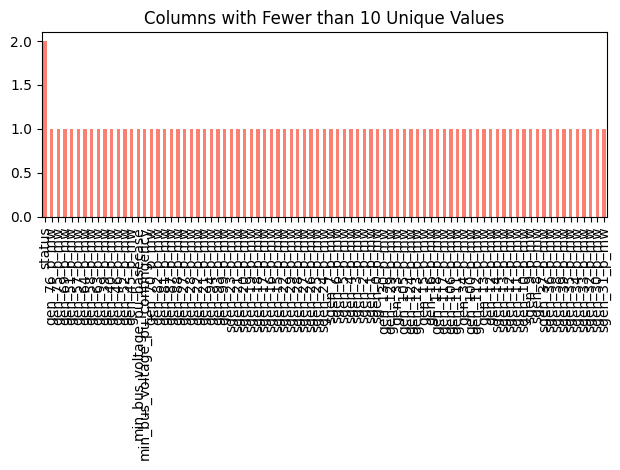

In [16]:
few_uniques.plot(kind='bar', color='salmon')
plt.title('Columns with Fewer than 10 Unique Values')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

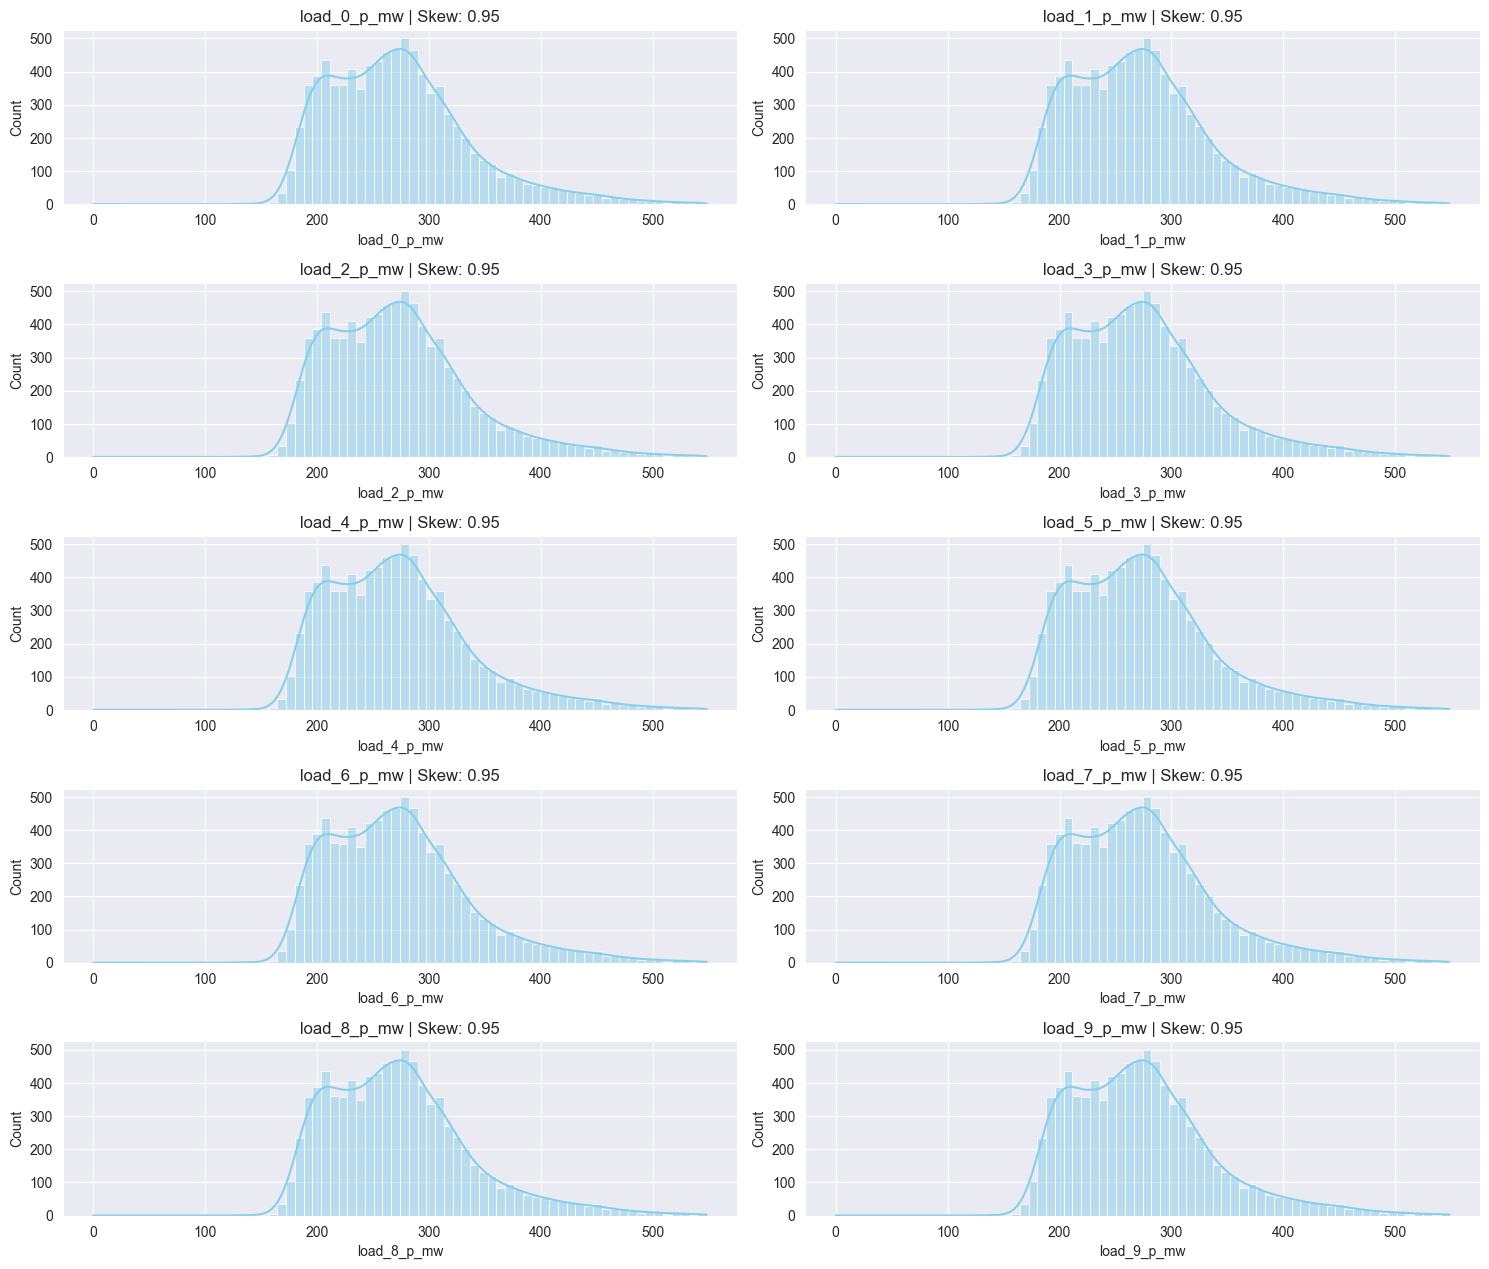

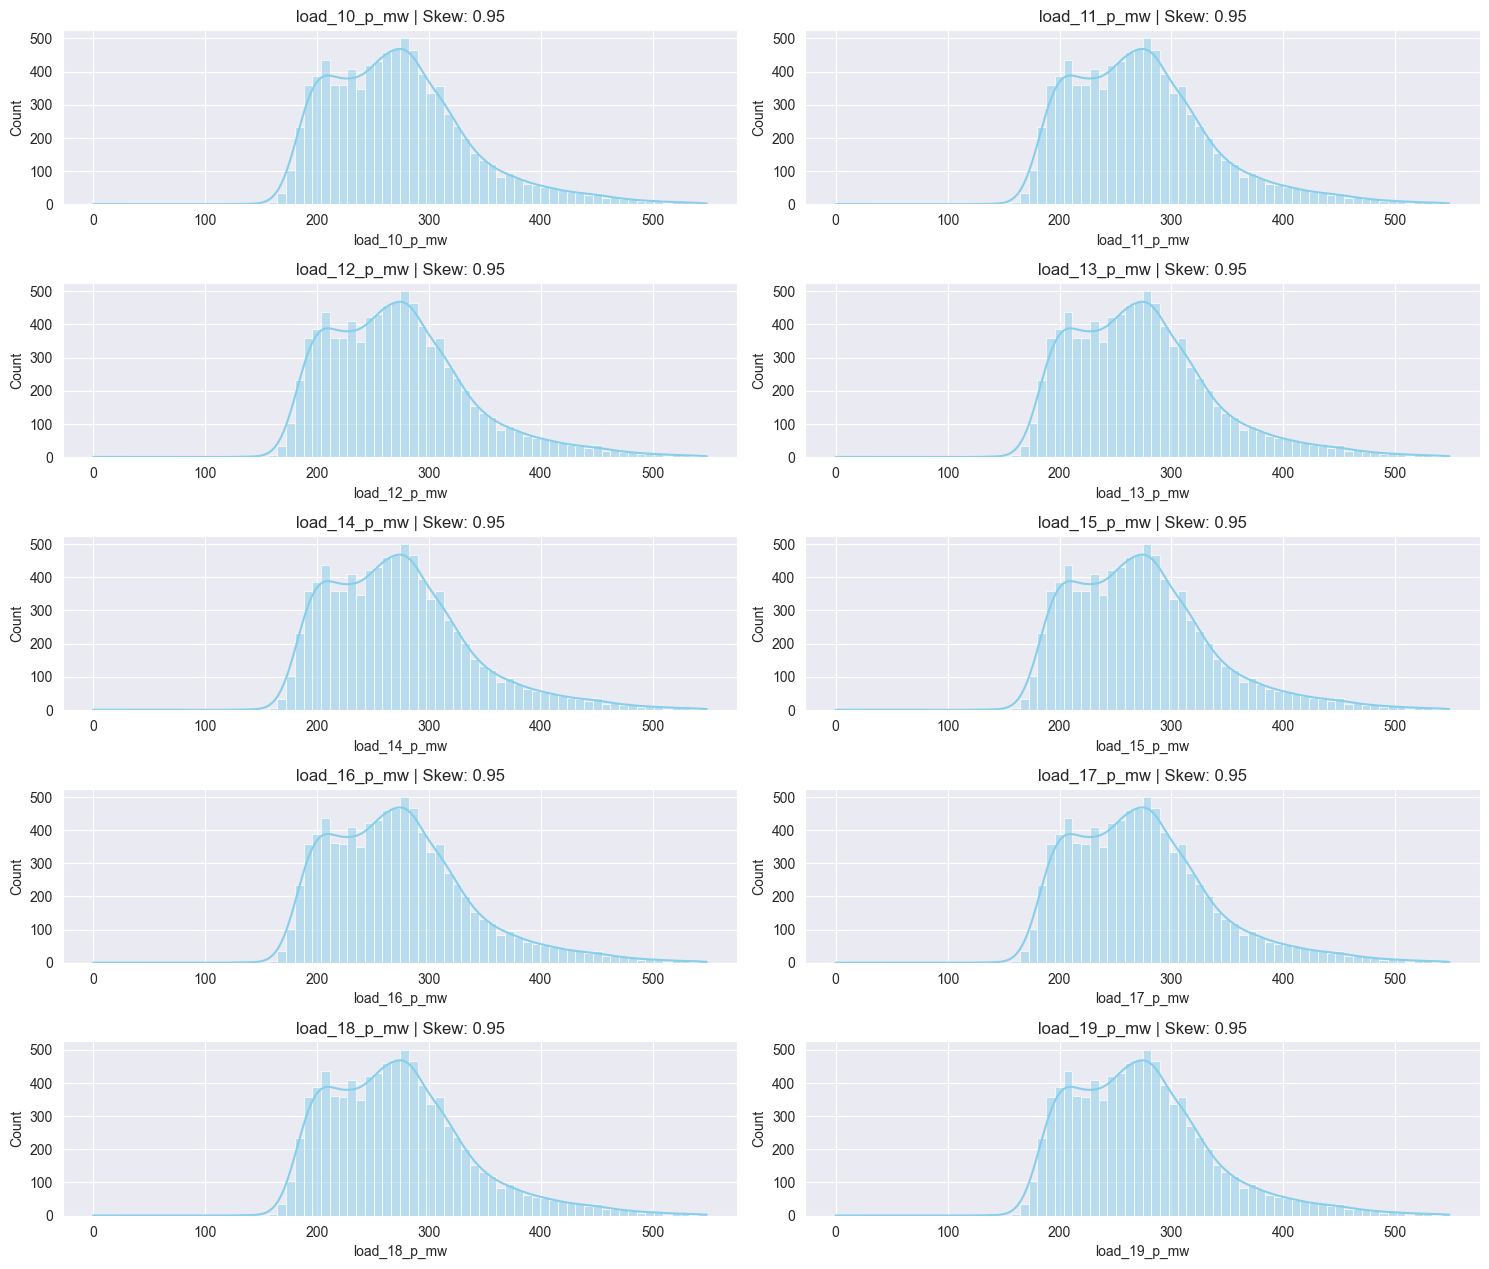

In [17]:
# ----------------------------
# KDE plot
# ----------------------------

sns.set_style("darkgrid")
load_columns = [col for col in df.columns if col.startswith("load_")]
load_columns = [col for col in load_columns if int(col.split("_")[1]) <= 19]
chunk_size = 10

for i in range(0, len(load_columns), chunk_size):
    chunk = load_columns[i:i+chunk_size]
    
    plt.figure(figsize=(15, chunk_size * 2.5))
    for idx, feature in enumerate(chunk, 1):
        plt.subplot(len(chunk), 2, idx)
        sns.histplot(df[feature], kde=True, color="skyblue")
        plt.title(f"{feature} | Skew: {round(df[feature].skew(), 2)}")
    
    plt.tight_layout()
    plt.show()


C:\Users\gl8304\AppData\Local\Temp\ipykernel_14956\3777844943.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x="status", y="max_line_loading_percent_basecase", data=df, palette='coolwarm')
c:\Users\gl8304\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 64.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\gl8304\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 27.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\gl8304\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 79.8% of the points cannot be 

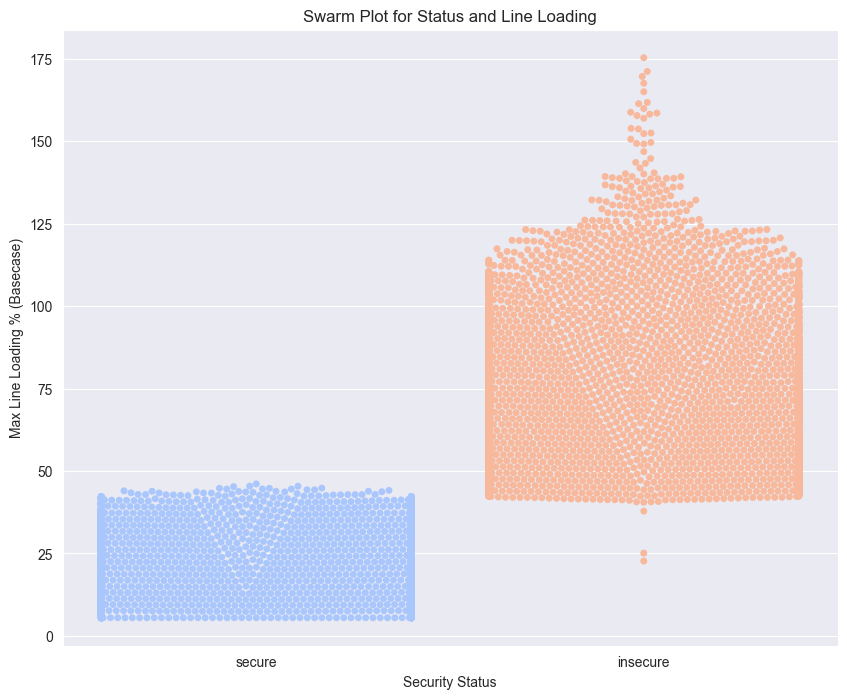

In [18]:
plt.figure(figsize=(10, 8))

sns.swarmplot(x="status", y="max_line_loading_percent_basecase", data=df, palette='coolwarm')

plt.title('Swarm Plot for Status and Line Loading')
plt.xlabel('Security Status')
plt.ylabel('Max Line Loading % (Basecase)')
plt.show()

In [19]:
col = "max_line_loading_percent_basecase"

mean_value = df[col].mean()
min_value = df[col].min()
max_value = df[col].max()

print(f"Mean: {mean_value:.2f}%")
print(f"Min:  {min_value:.2f}%")
print(f"Max:  {max_value:.2f}%")

Mean: 46.79%
Min:  5.49%
Max:  175.33%


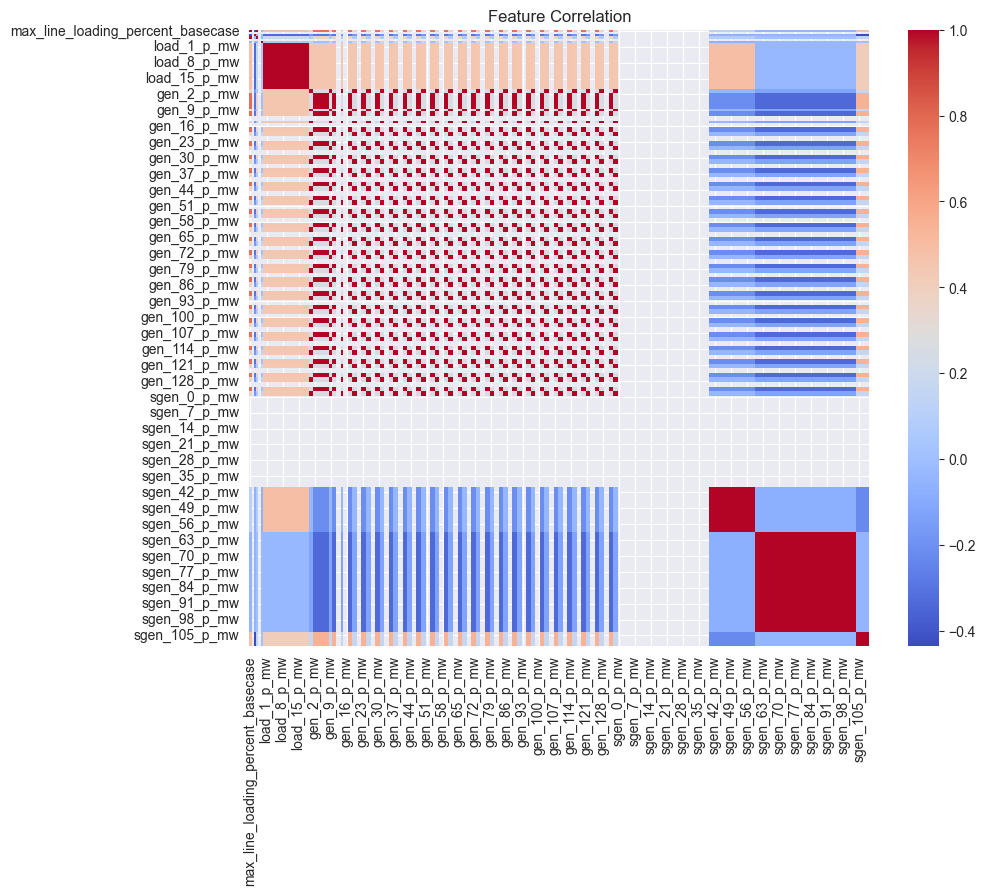

In [20]:
# ----------------------------
# Correlation Matrix (Numerical Features Only)
# ----------------------------
# This heatmap shows pairwise Pearson correlations between all numerical features in the dataset.

# - Red = strong positive correlation --> meaning these generators tend to produce similar outputs at the same time. --> high redundancy
# - Blue = strong negative correlation --> meaning when one increases, the other decreases.
# - White/light = little or no correlation --> meaning they contribute independent information.

# Insights:
# - Generator outputs (`gen_X_p_mw`) are highly correlated with each other. 
# - Small generator features (`sgen_X_p_mw`) are mostly uncorrelated — may contain diverse information. 
# - Certain line loading and voltage features show moderate correlations with generation or load values.

#--------

# What’s the point of this correlation heatmap?
# It shows us which features are strongly related (e.g., all the load_X_p_mw) and which ones are independent.

# Red = strong positive correlation (močna pozitivna povezava)
# Blue = strong negative correlation (močna negativna povezava)
# Neutral = little to no correlation (brez povezave)

# Why do we need this?
# - To detect redundant features
# - To decide which features to keep or remove
# - To better understand which variables influence system security

plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=False, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

In [21]:
numeric_cols = df.select_dtypes(include='number').columns
print(f"Number of numerical features: {len(numeric_cols)}")
print(numeric_cols.tolist())

Number of numerical features: 271
['max_line_loading_percent_basecase', 'min_bus_voltage_pu_basecase', 'max_bus_voltage_pu_basecase', 'max_line_loading_percent_contingency', 'min_bus_voltage_pu_contingency', 'max_bus_voltage_pu_contingency', 'load_0_p_mw', 'load_1_p_mw', 'load_2_p_mw', 'load_3_p_mw', 'load_4_p_mw', 'load_5_p_mw', 'load_6_p_mw', 'load_7_p_mw', 'load_8_p_mw', 'load_9_p_mw', 'load_10_p_mw', 'load_11_p_mw', 'load_12_p_mw', 'load_13_p_mw', 'load_14_p_mw', 'load_15_p_mw', 'load_16_p_mw', 'load_17_p_mw', 'load_18_p_mw', 'load_19_p_mw', 'gen_0_p_mw', 'gen_1_p_mw', 'gen_2_p_mw', 'gen_3_p_mw', 'gen_4_p_mw', 'gen_5_p_mw', 'gen_6_p_mw', 'gen_7_p_mw', 'gen_8_p_mw', 'gen_9_p_mw', 'gen_10_p_mw', 'gen_11_p_mw', 'gen_12_p_mw', 'gen_13_p_mw', 'gen_14_p_mw', 'gen_15_p_mw', 'gen_16_p_mw', 'gen_17_p_mw', 'gen_18_p_mw', 'gen_19_p_mw', 'gen_20_p_mw', 'gen_21_p_mw', 'gen_22_p_mw', 'gen_23_p_mw', 'gen_24_p_mw', 'gen_25_p_mw', 'gen_26_p_mw', 'gen_27_p_mw', 'gen_28_p_mw', 'gen_29_p_mw', 'gen_30_

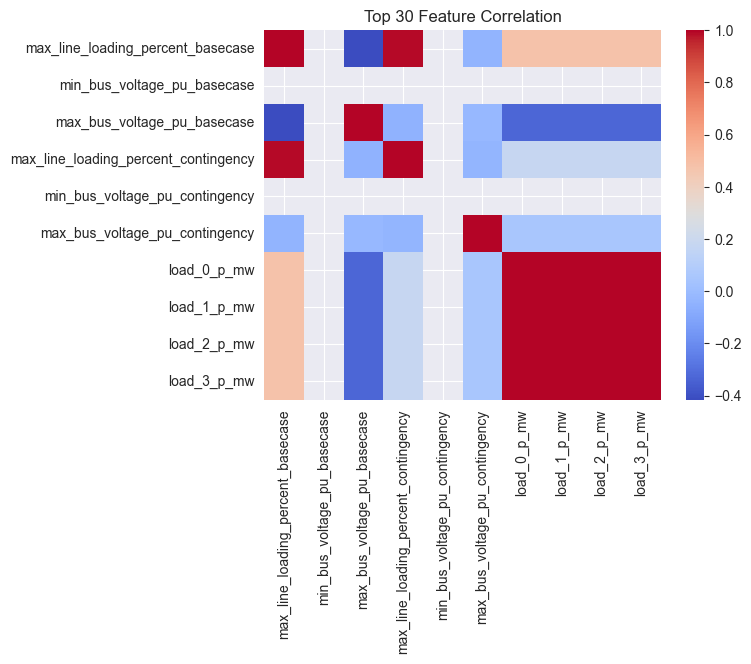

In [22]:
numeric_cols = df.select_dtypes(include='number').columns[:10]
corr_subset = df[numeric_cols].corr()

sns.heatmap(corr_subset, cmap='coolwarm')
plt.title("Top 30 Feature Correlation")
plt.show()

C:\Users\gl8304\AppData\Local\Temp\ipykernel_14956\615328498.py:6: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


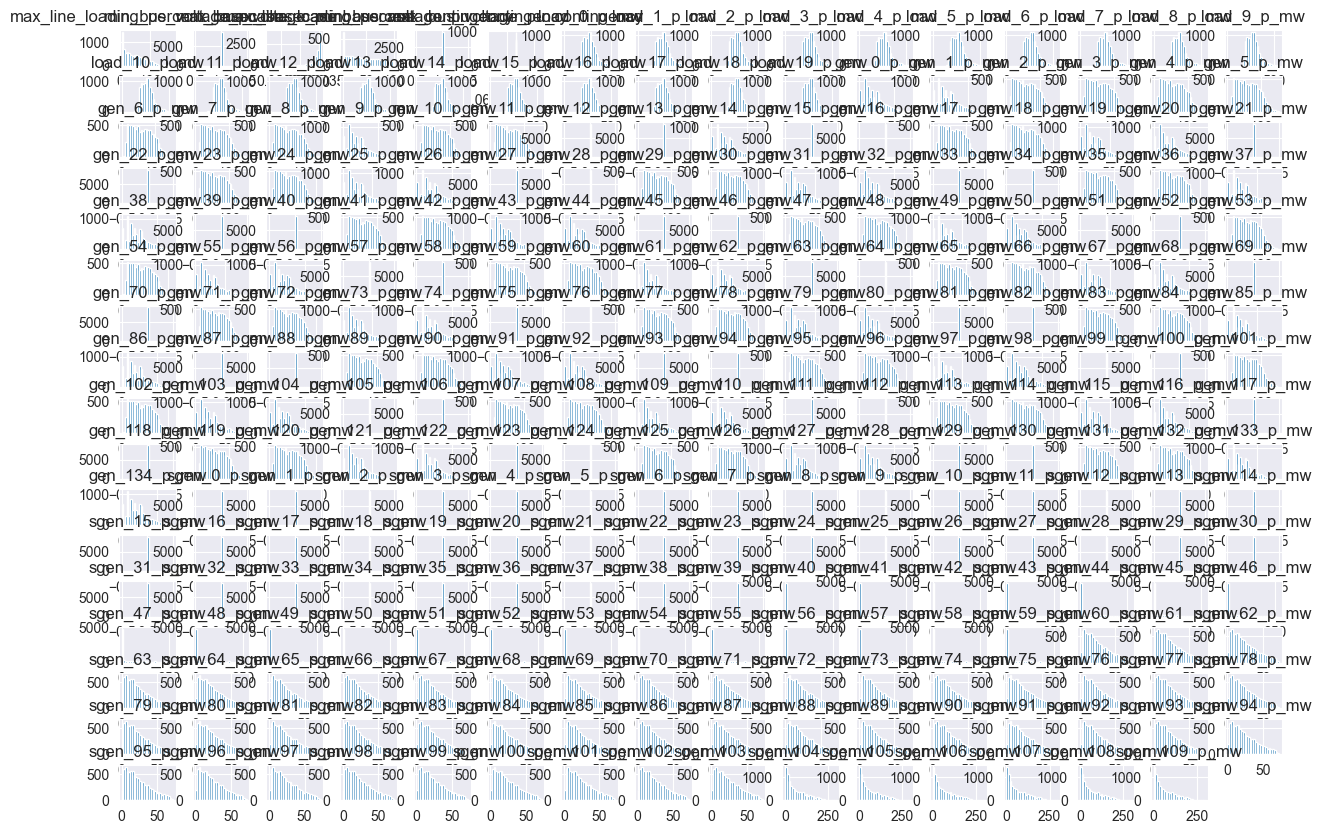

In [23]:
# ----------------------------
# Histograms for All Features
# ----------------------------

df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

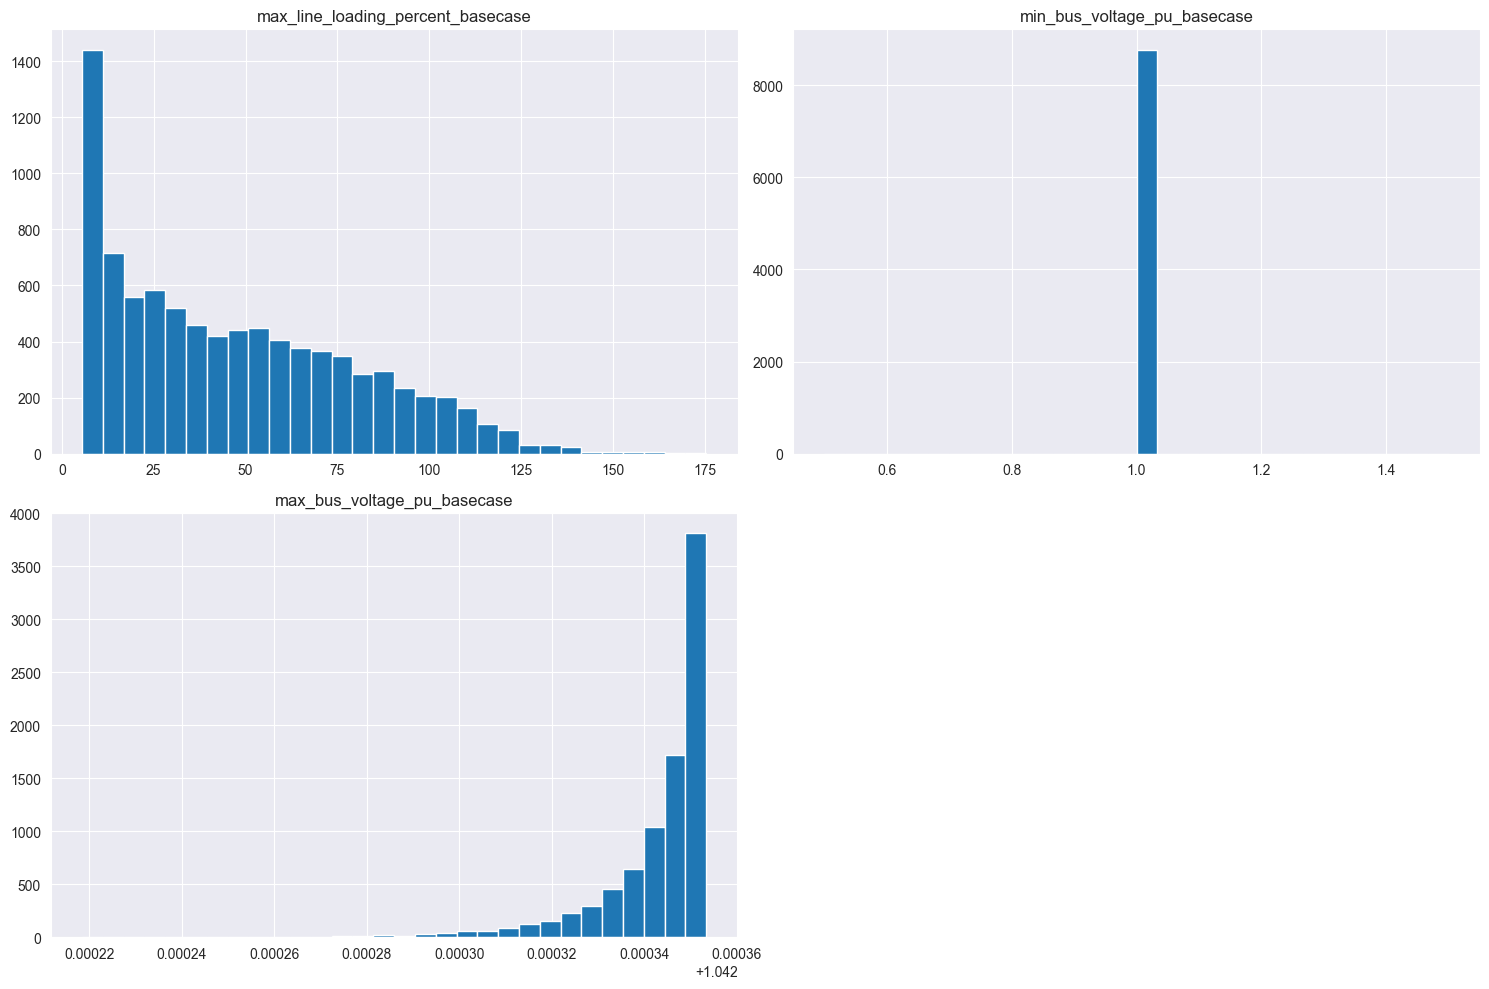

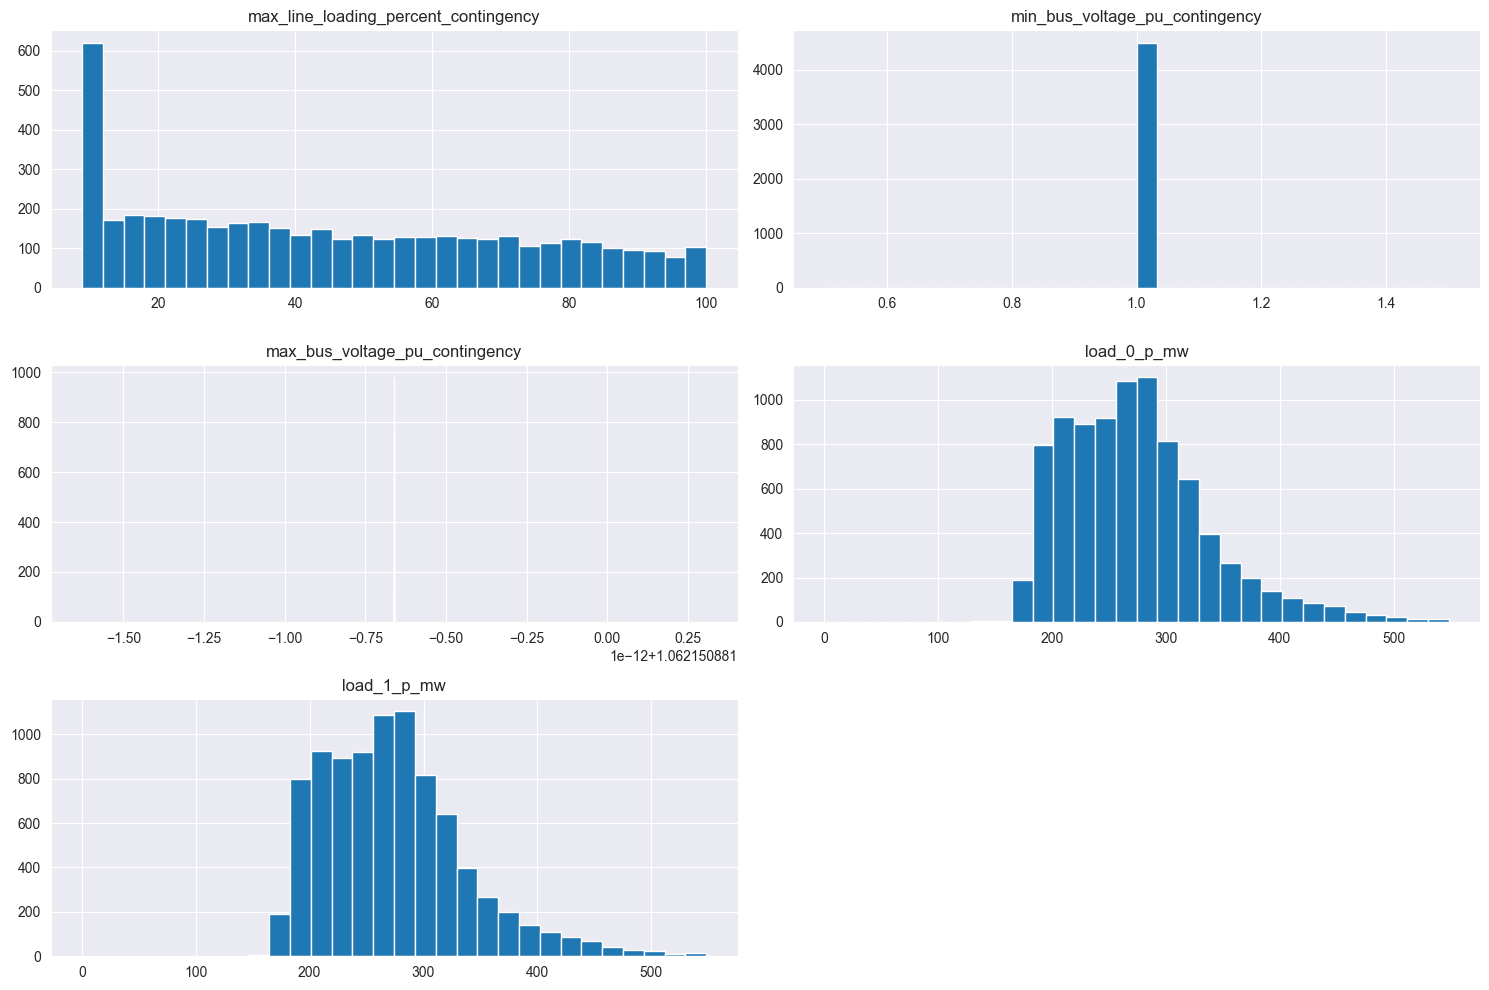

In [24]:
# ----------------------------
# Limit number of histograms
# ----------------------------

chunk_size = 5
max_histograms = 10  # total number of histograms allowed
num_features = min(df.shape[1], max_histograms)

# Plot in chunks of 10 features, up to the max limit
for i in range(0, num_features, chunk_size):
    df.iloc[:, i:i+chunk_size].hist(bins=30, figsize=(15, 10))
    plt.tight_layout()
    plt.show()

In [25]:
df['max_bus_voltage_pu_contingency'].describe()

count    4.497000e+03
mean     1.062151e+00
std      4.839237e-16
min      1.062151e+00
25%      1.062151e+00
50%      1.062151e+00
75%      1.062151e+00
max      1.062151e+00
Name: max_bus_voltage_pu_contingency, dtype: float64

In [26]:
df['max_bus_voltage_pu_contingency'].unique()

array([1.06215088, 1.06215088,        nan, 1.06215088, 1.06215088,
       1.06215088, 1.06215088, 1.06215088, 1.06215088, 1.06215088,
       1.06215088, 1.06215088, 1.06215088, 1.06215088, 1.06215088,
       1.06215088])

In [27]:
# ----------------------------
# Target Label Distribution (Repeat for Clarity)
# ----------------------------

print(df['status'].value_counts())

status
secure      4497
insecure    4272
Name: count, dtype: int64


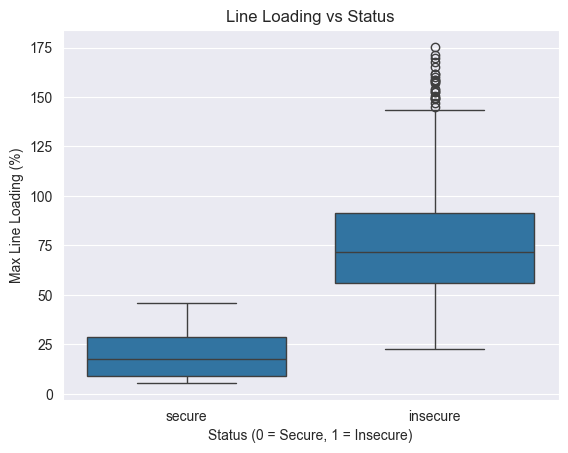

In [28]:
# ----------------------------
# Example: Boxplot by Status
# ----------------------------

sns.boxplot(x='status', y='max_line_loading_percent_basecase', data=df)
plt.title('Line Loading vs Status')
plt.xlabel("Status (0 = Secure, 1 = Insecure)")
plt.ylabel("Max Line Loading (%)")
plt.show()

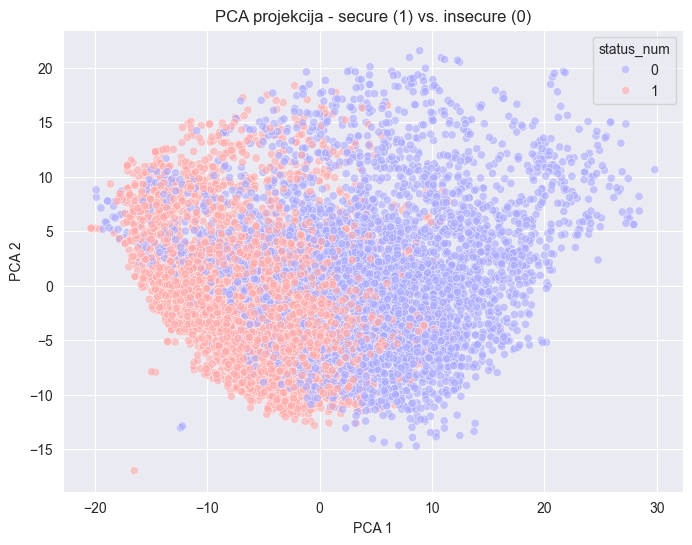

In [30]:
# 1) naloži podatke
df = pd.read_csv('../data/simulation_security_labels_n-1.csv')

# 2) pretvori label v številko
df["status_num"] = df["status"].map({"secure": 1, "insecure": 0})

# 3) odstrani neuporabne stolpce
# timestamp in originalni status odstraniš iz X
X = df.drop(columns=["timestamp", "status", "status_num"])

# 4) impute missing (ker imaš NaNe)
X = X.fillna(X.mean())

# 5) standardiziraj podatke
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6) PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 7) plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df["status_num"], palette="bwr", alpha=0.6)
plt.title("PCA projekcija - secure (1) vs. insecure (0)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()